<a href="https://colab.research.google.com/github/ayushanand18/ocean-research-py/blob/main/notebooks/ayush's_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration
Let us explorate our data and bring out areas where we need to focus on in future.

## Installing `pyobis`

In [1]:
try:
    import pyobis
except:
    %pip -q install pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


## Importing other modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyobis.occurrences import OccQuery
import cartopy

## Setting up environment

In [3]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (18,10)
occ = OccQuery()

## Species to count on
+ in west 
    + [x] ~126417 -> Clupea harengus Linnaeus~
    + [x] ~126436 -> Gadus morhua Linnaeus~
    + [x] ~126438 -> Merlangius merlangus~
    + [x] ~126444 -> Trisopterus esmarkii~
    + [x] ~126437 -> Melanogrammus aeglefinus~
    + [x] ~126425 -> Sprattus sprattus~
    + [x] ~127141 -> Platichthys flesus~
    + [x] ~126792 -> Callionymus lyra Linnaeus~
    + [x] ~126852 -> Trachurus trachurus~
    + [x] ~110674 -> Meganyctiphanes Holt & Tattersall, high missing depth~
+ in other parts
    + [x] ~274294 -> Microstomus pacificus, west US coast~
    + [x] 159581 -> Acanthurus coeruleus Bloch & Schneider
    + [x] ~110679 -> Thysanoessa Brandt, check below australia~
+ some special mentions
    + [x] ~382879 -> Jasus edwardsii, numbers have declined over years~
    + [x] 106656 -> Oithona similis Claus, seems really weird and interesting
    + [x] ~127094 -> Xiphias gladius Linnaeus, less time range but good variety~

## Analysis

## Taxon 126438

In [4]:
_126438 = occ.search(
    taxonid = 126438,
    startdate = "1999-01-01",
    enddate = "2015-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 226816/226816
Fetched 226816 records.


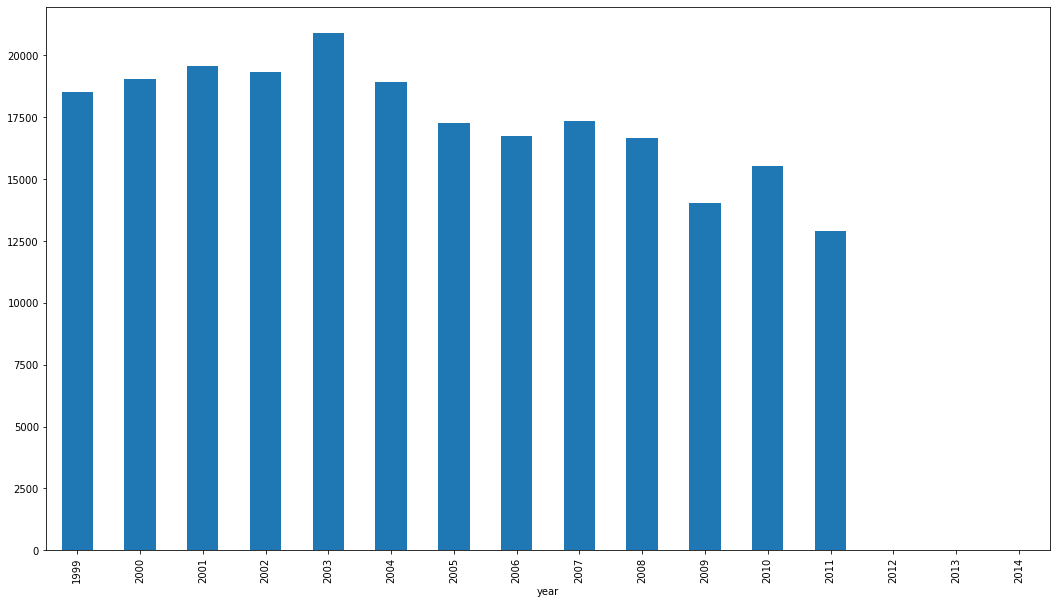

In [5]:
_126438.groupby("year").scientificName.count().plot.bar();

<AxesSubplot:xlabel='year', ylabel='depth'>

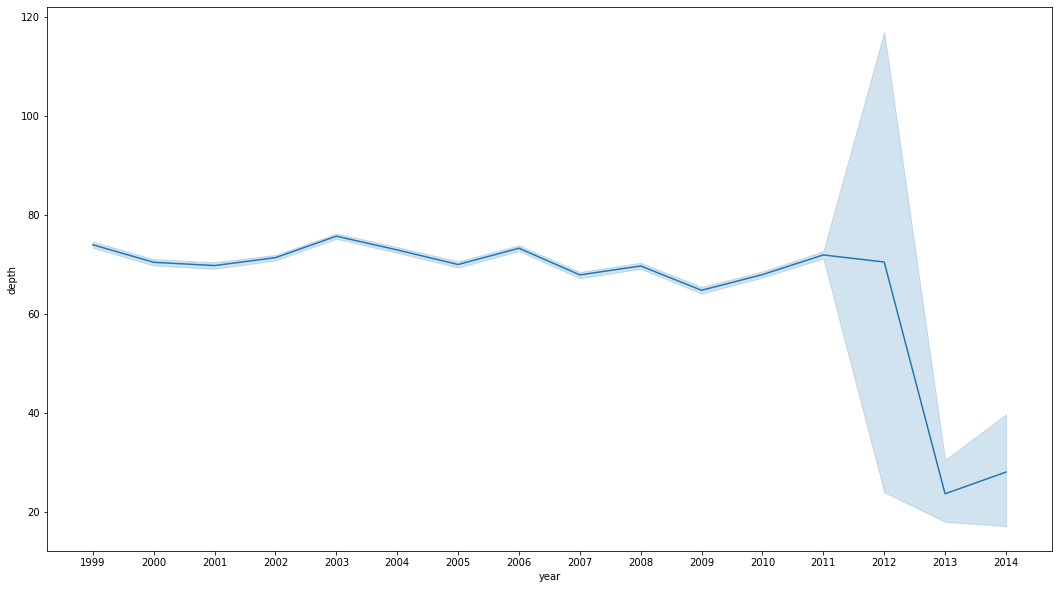

In [6]:
_126438.sort_values(by="year", inplace=True)
sns.lineplot(x = _126438["year"], y=_126438["depth"])

<AxesSubplot:xlabel='year', ylabel='depth'>

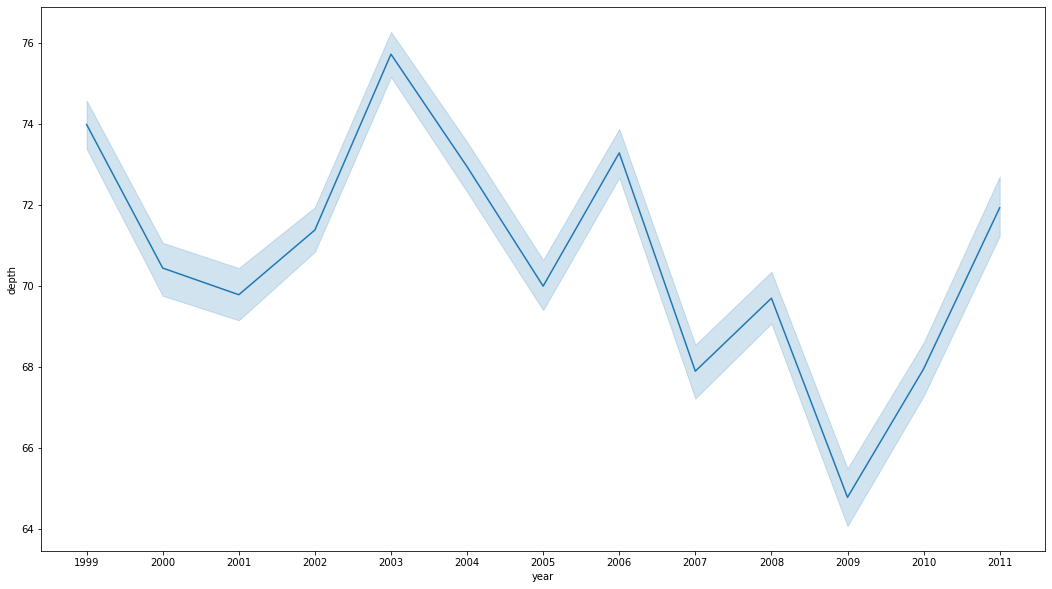

In [7]:
_126438.sort_values(by="year", inplace=True)
sns.lineplot(x = _126438[_126438["year"]<"2012"]["year"], y=_126438[_126438["year"]<"2012"]["depth"])

## Taxon 126436

In [8]:
_126436 = occ.search(
    taxonid = 126436,
    startdate = "1999-01-01",
    enddate = "2015-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 241675/241675
Fetched 241675 records.


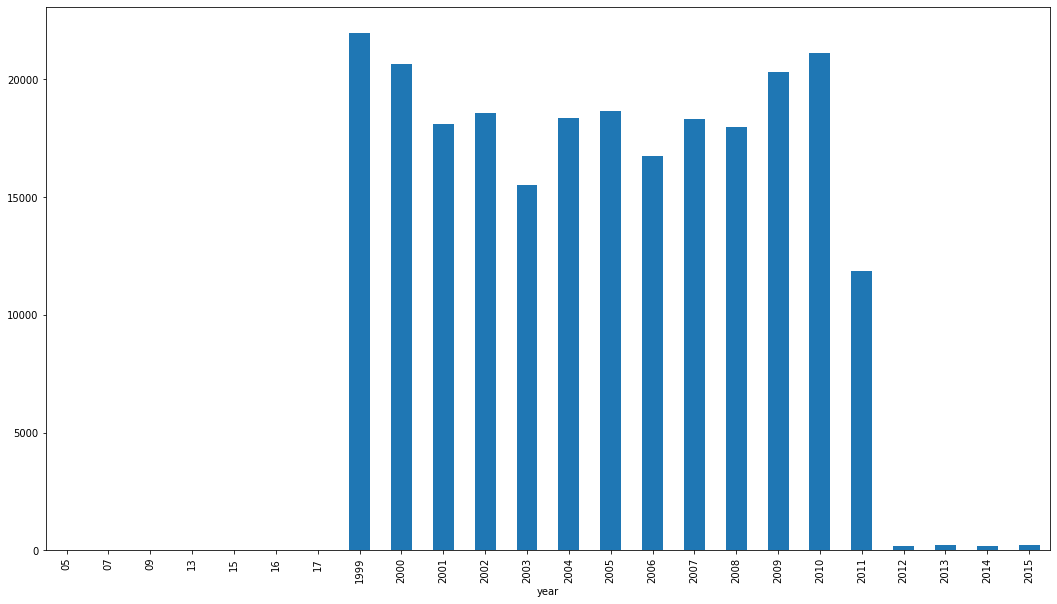

In [9]:
_126436.groupby("year").scientificName.count().plot.bar();

<AxesSubplot:xlabel='year', ylabel='depth'>

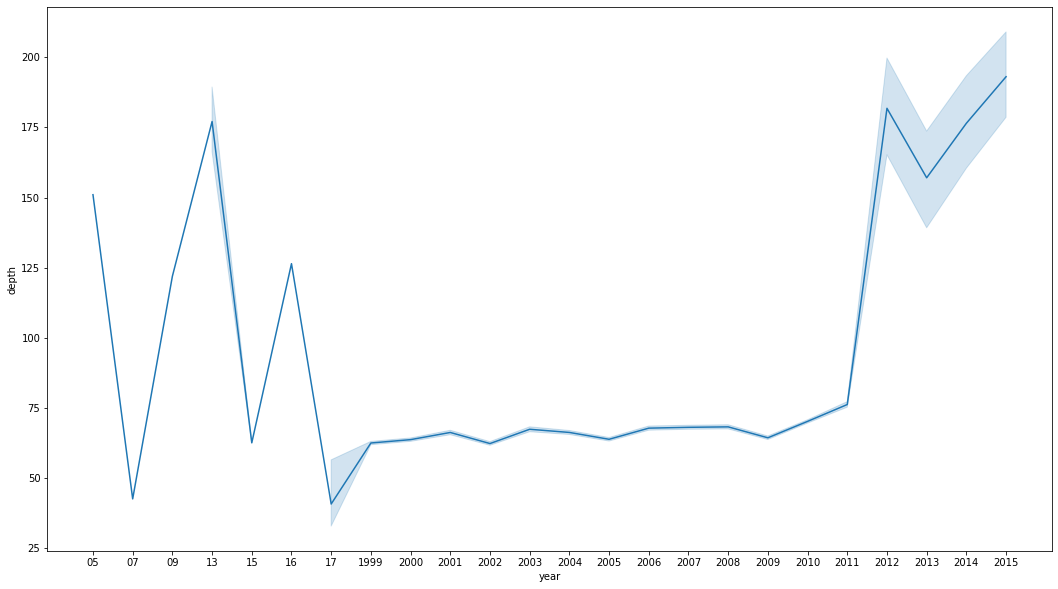

In [10]:
_126436.sort_values(by="year", inplace=True)
sns.lineplot(x = _126436["year"], y=_126436["depth"])

<AxesSubplot:xlabel='year', ylabel='depth'>

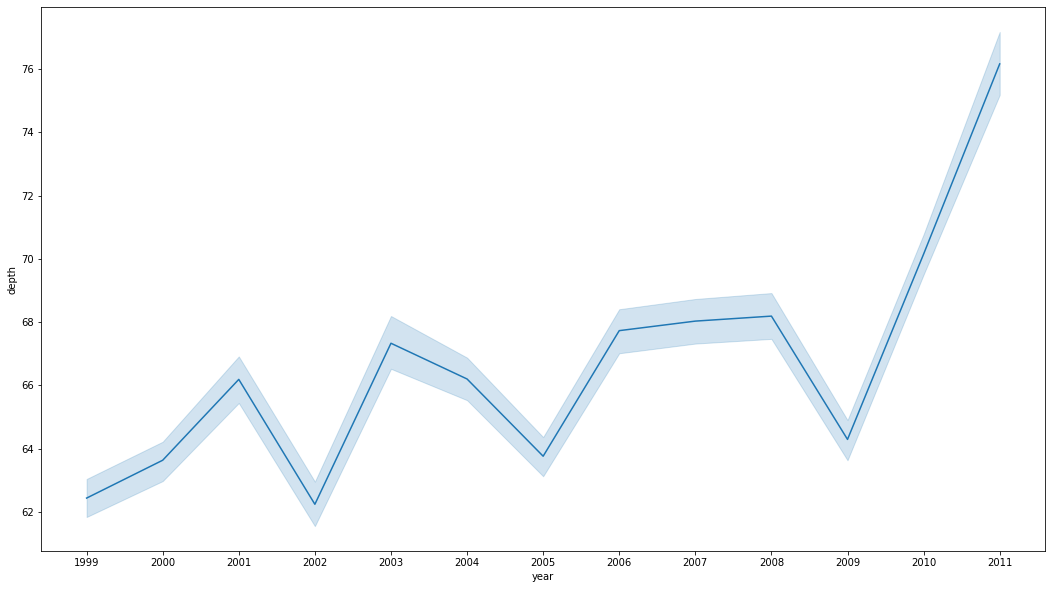

In [11]:
_126436.sort_values(by="year", inplace=True)
sns.lineplot(x = _126436[_126436["year"].astype(float).between(1999, 2011)]["year"], y=_126436[_126436["year"].astype(float).between(1999, 2011)]["depth"])

## Taxon 126417

In [12]:
_126417 = occ.search(
    taxonid = 126417,
    startdate = "1999-01-01",
    enddate = "2015-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 284631/284631
Fetched 284631 records.


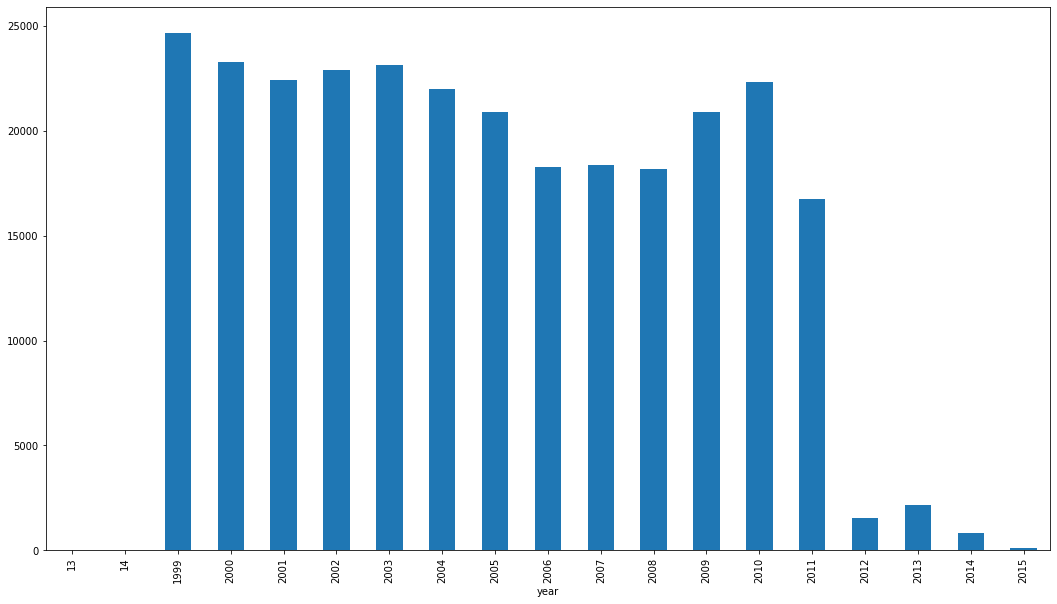

In [13]:
_126417.groupby("year").scientificName.count().plot.bar();

<AxesSubplot:xlabel='year', ylabel='depth'>

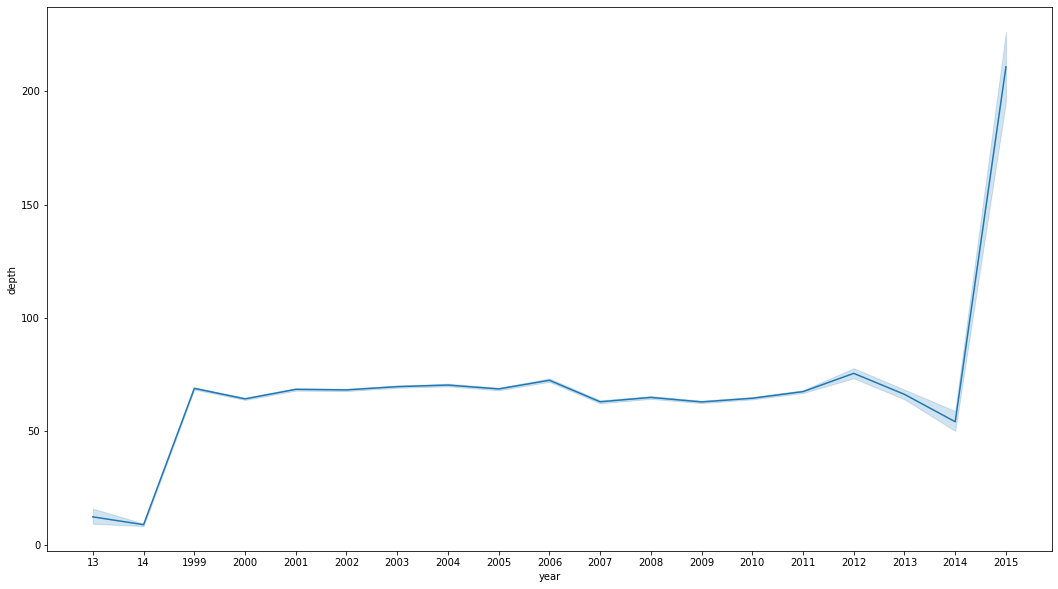

In [14]:
_126417.sort_values(by="year", inplace=True)
sns.lineplot(x = _126417["year"], y=_126417["depth"])

<AxesSubplot:xlabel='year', ylabel='depth'>

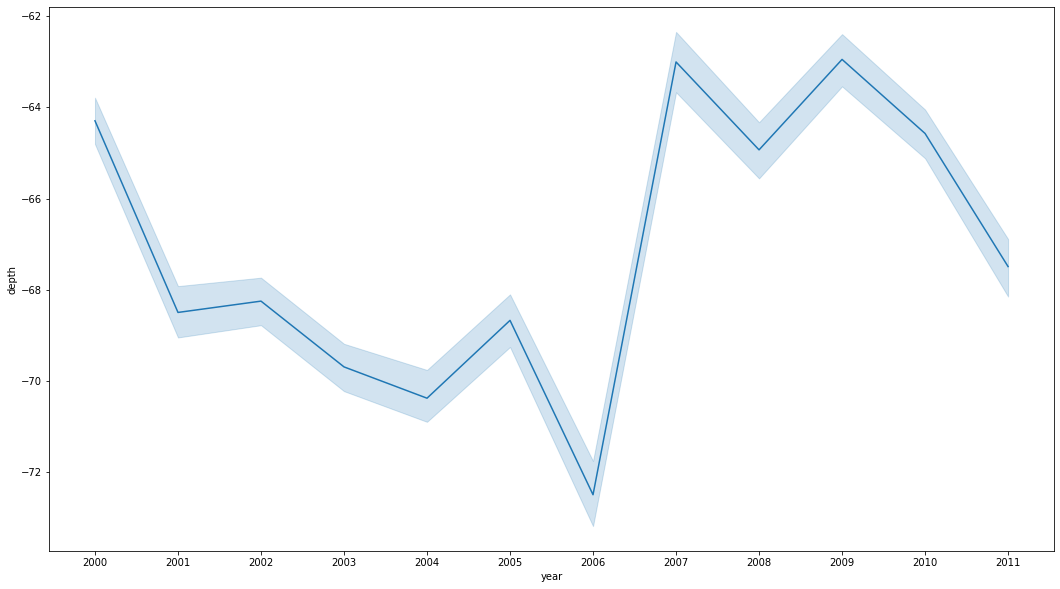

In [15]:
sns.lineplot(x = _126417[(_126417["year"]<"2012") & (_126417["year"]>"1999")]["year"], y=-_126417[(_126417["year"]<"2012") & (_126417["year"]>"1999")]["depth"])

## Taxon 106656

In [16]:
_106 = occ.search(
    taxonid = 106656,
    startdate = "1999-01-01",
    enddate = "2015-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 54091/54091
Fetched 54091 records.


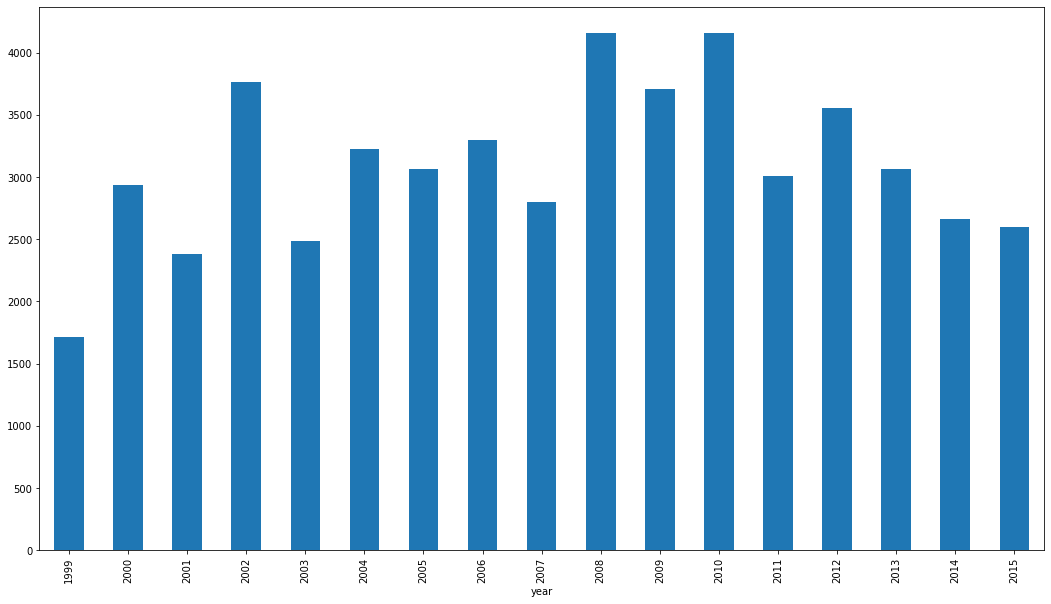

In [17]:
_106.groupby("year").scientificName.count().plot.bar();

<AxesSubplot:xlabel='year', ylabel='depth'>

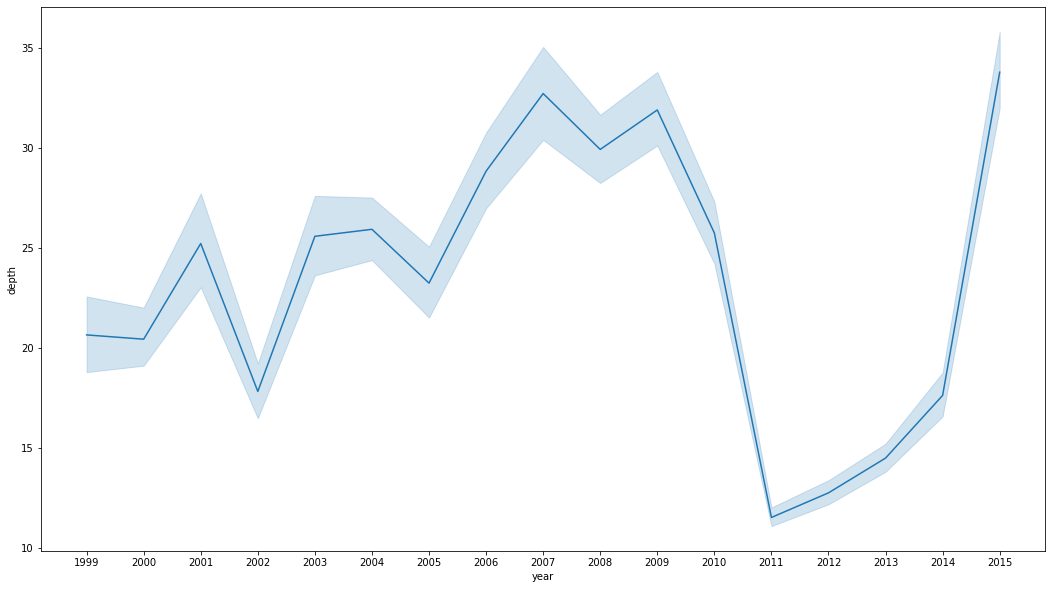

In [18]:
_106.sort_values(by="year", inplace=True)
sns.lineplot(x = _106["year"], y=_106["depth"])

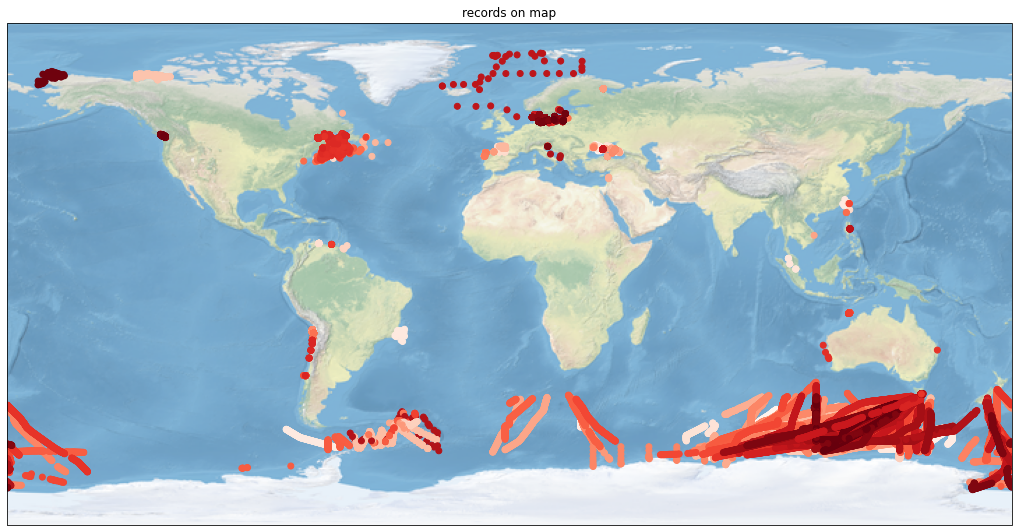

In [19]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_106, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")

plt.show()

## Taxon 127094

In [20]:
_127094 = occ.search(
    taxonid = 127094,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 86097/86097
Fetched 86097 records.


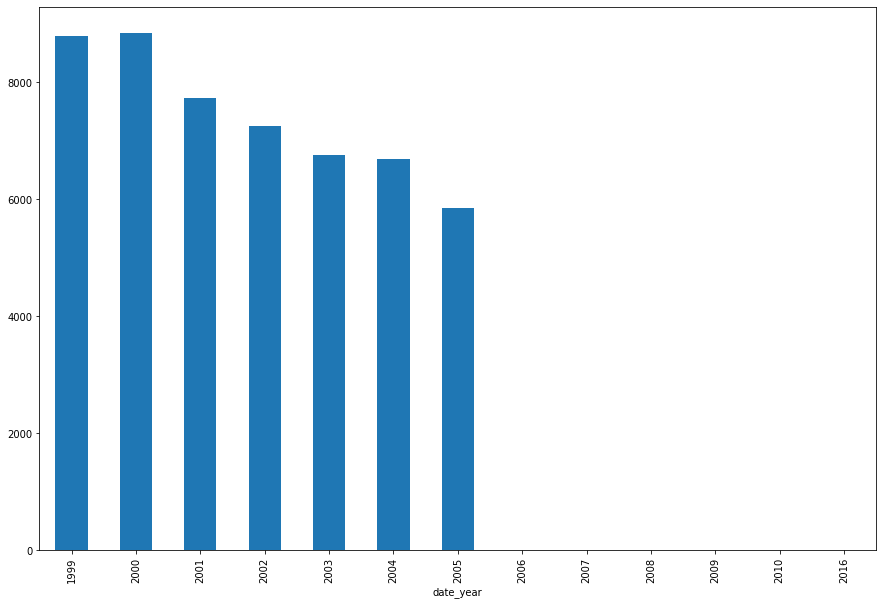

In [21]:
_127094.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='date_year', ylabel='depth'>

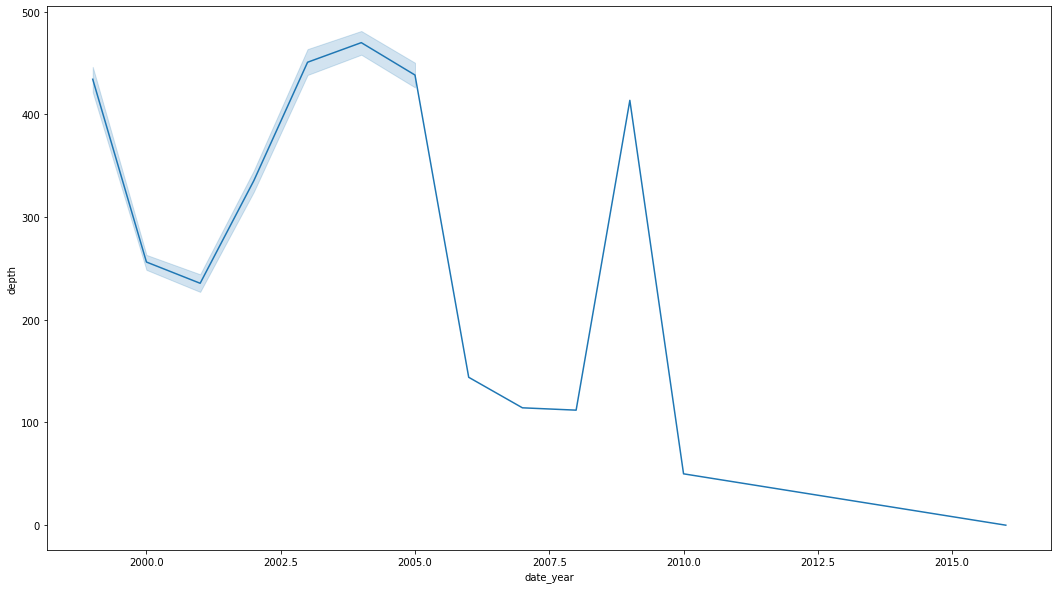

In [22]:
_127094.sort_values(by="date_year", inplace=True)
sns.lineplot(x = _127094["date_year"], y=_127094["depth"])

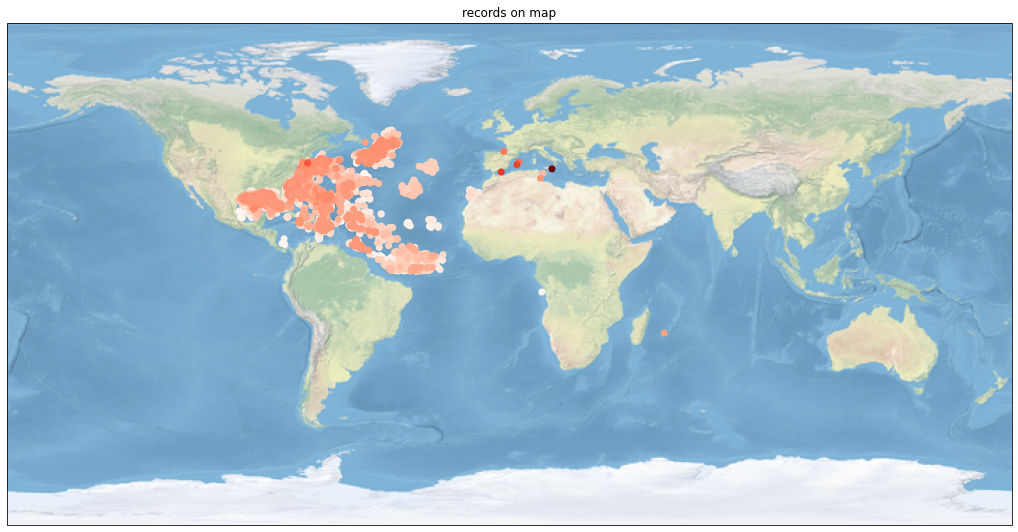

In [23]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_127094, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")

plt.show()

## Taxon 382879

In [24]:
_382879 =occ.search(
    taxonid = 382879,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 128970/128970
Fetched 128970 records.


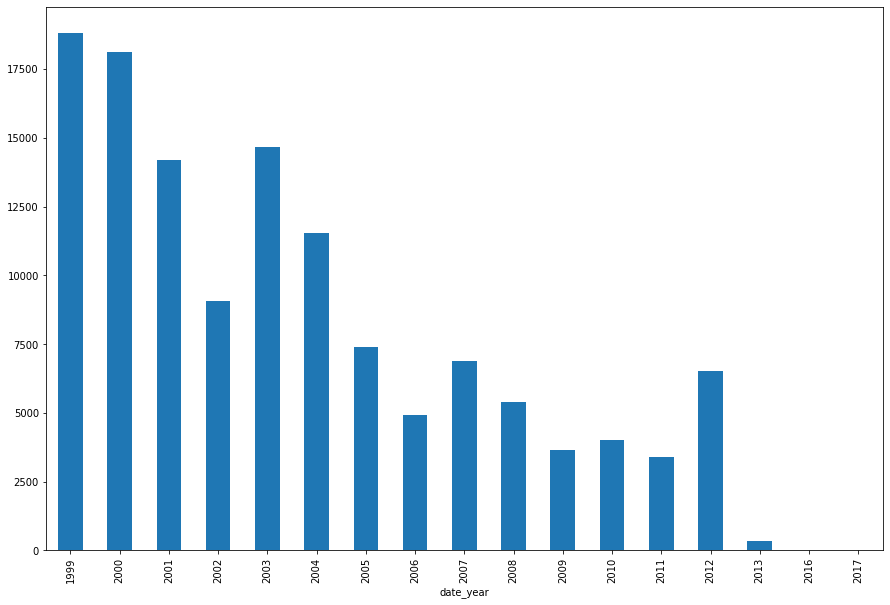

In [25]:
_382879.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

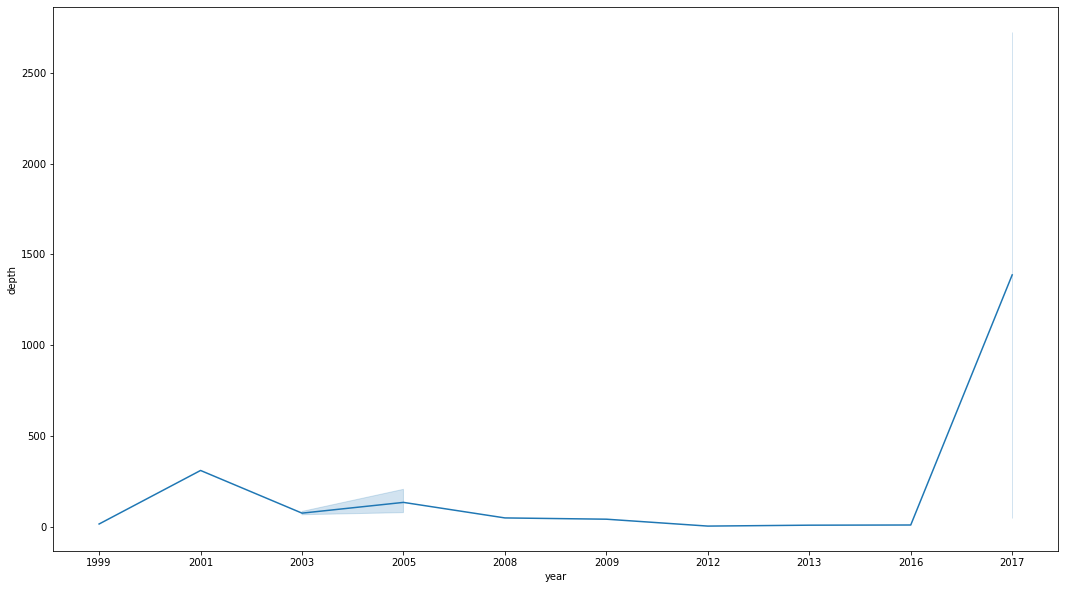

In [26]:
_382879.sort_values(by="year", inplace=True)
sns.lineplot(x = _382879["year"], y=_382879["depth"])

## Taxon 110679

In [27]:
_110679 = occ.search(
    taxonid = 110679,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 28023/28023
Fetched 28023 records.


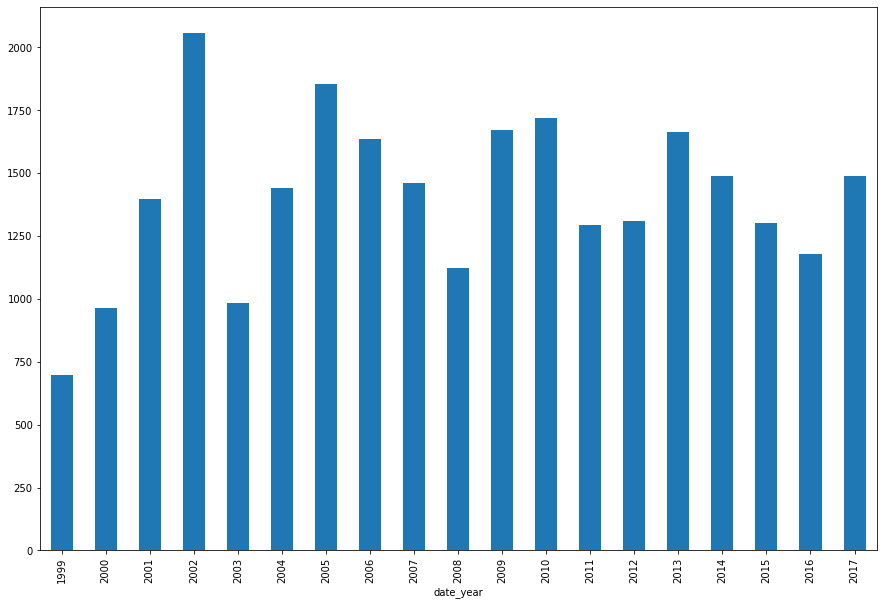

In [28]:
_110679.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

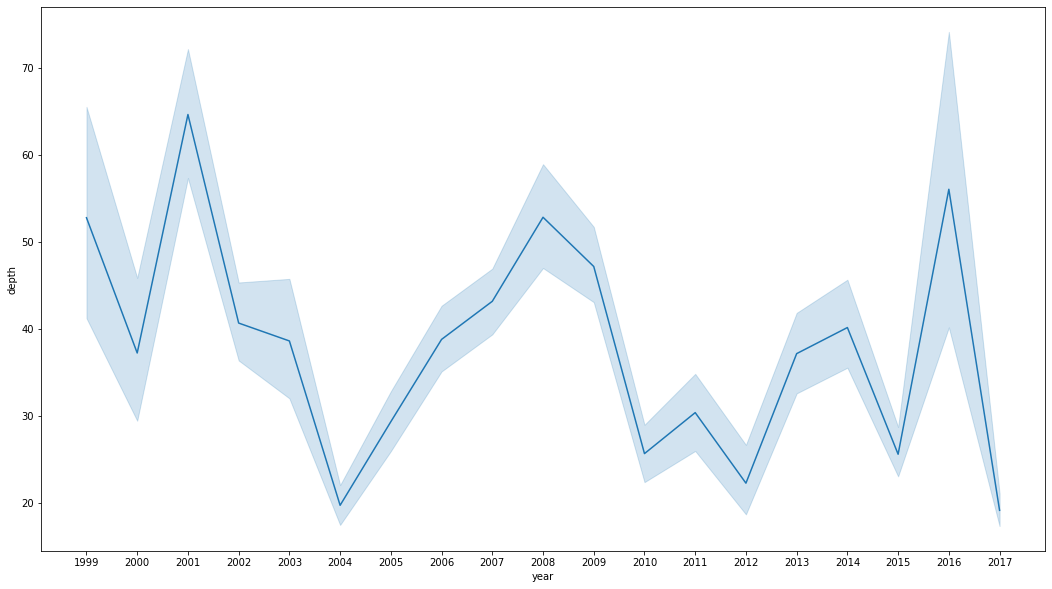

In [29]:
_110679.sort_values(by="year", inplace=True)
sns.lineplot(x = _110679["year"], y=_110679["depth"])

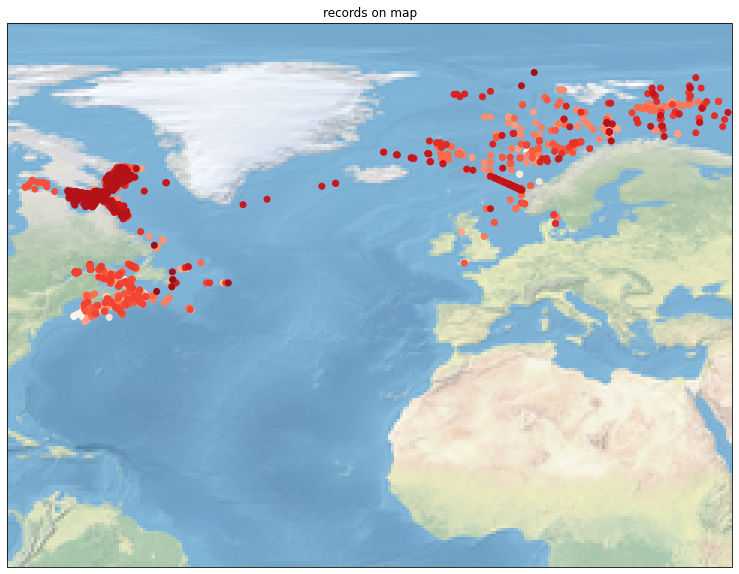

In [30]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_110679, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")
ax.set_xlim(-80,40)
ax.set_ylim(0,90)
plt.show()

In [31]:
new_df = _110679[(_110679["decimalLongitude"].between(-80,40)) & (_110679["decimalLatitude"].between(0,90)) ]

In [32]:
new_df.sort_values(by="date_year", inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


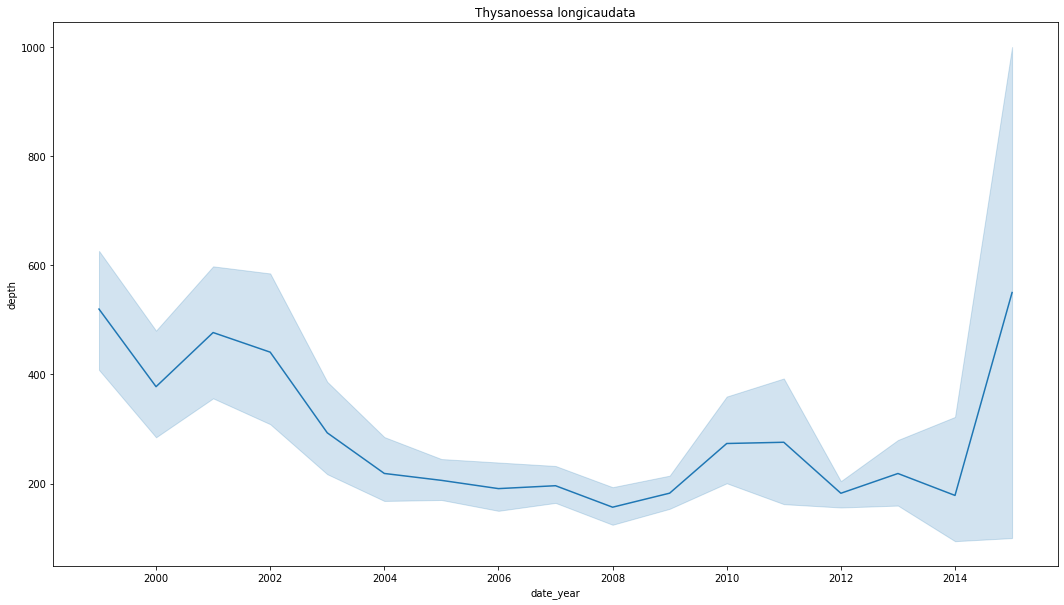

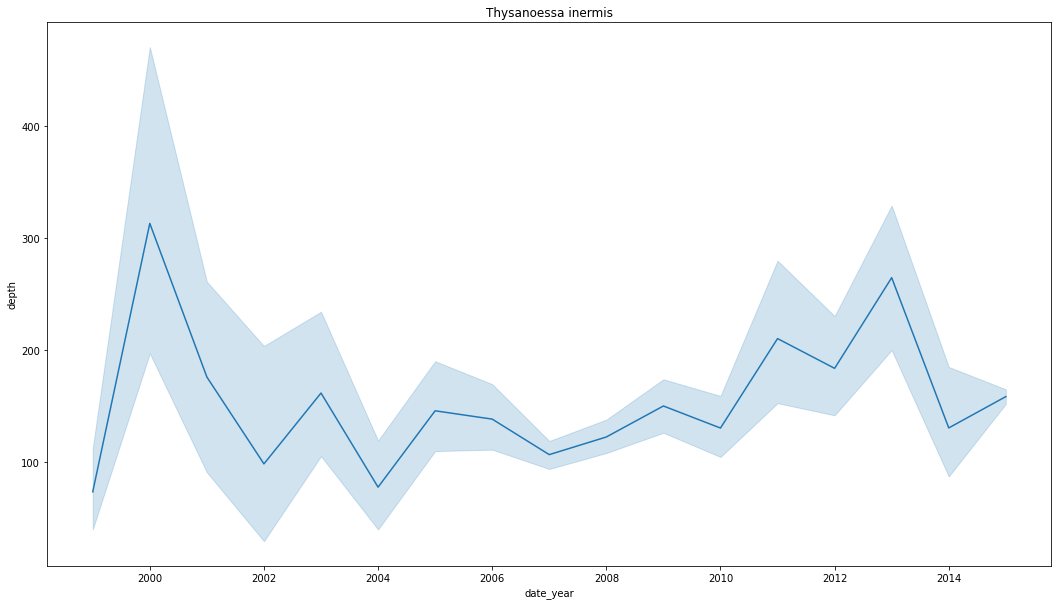

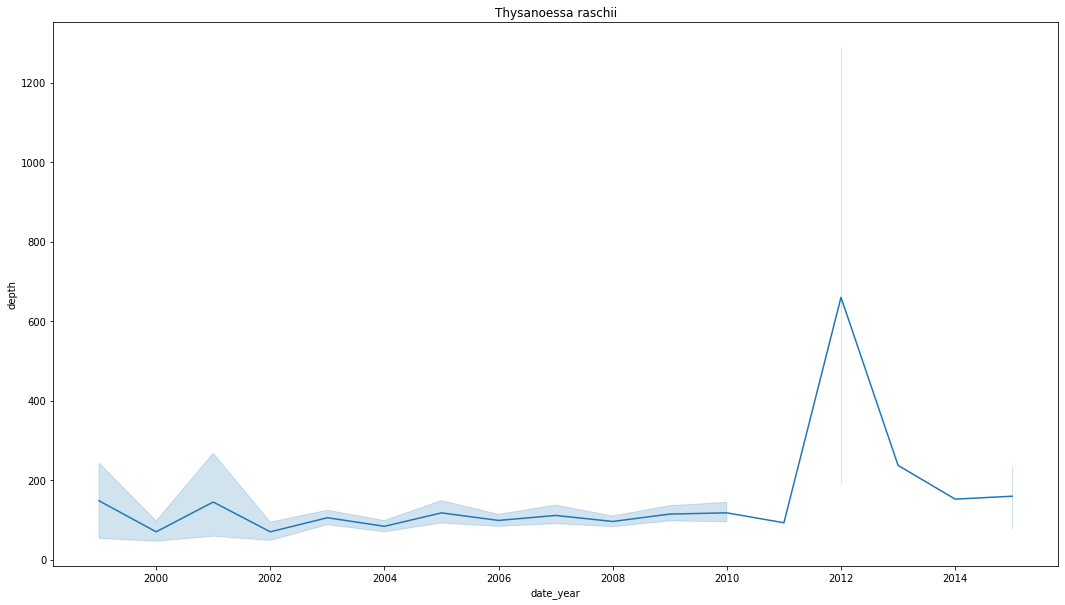

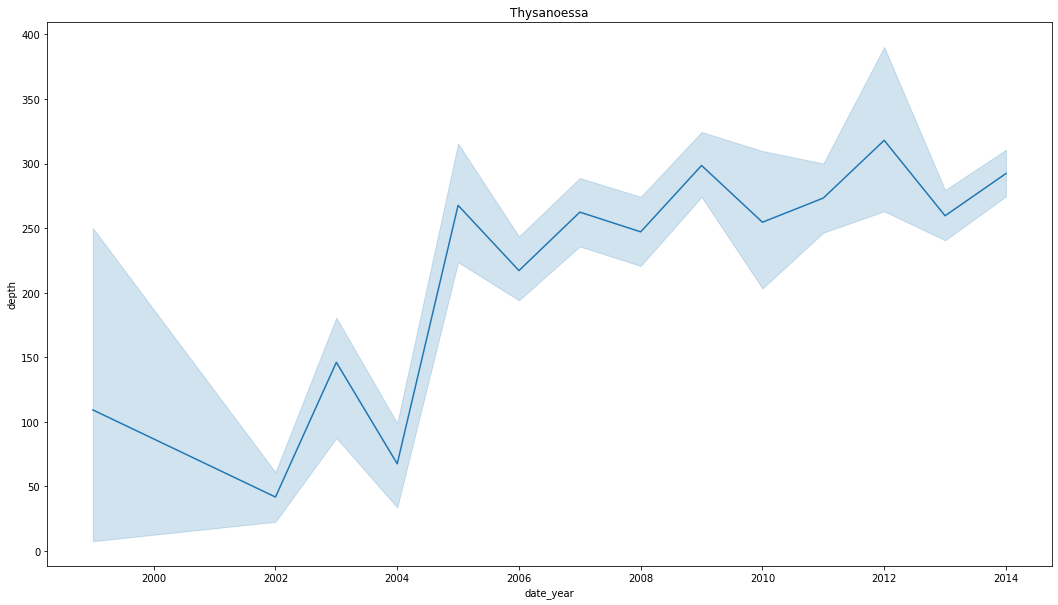

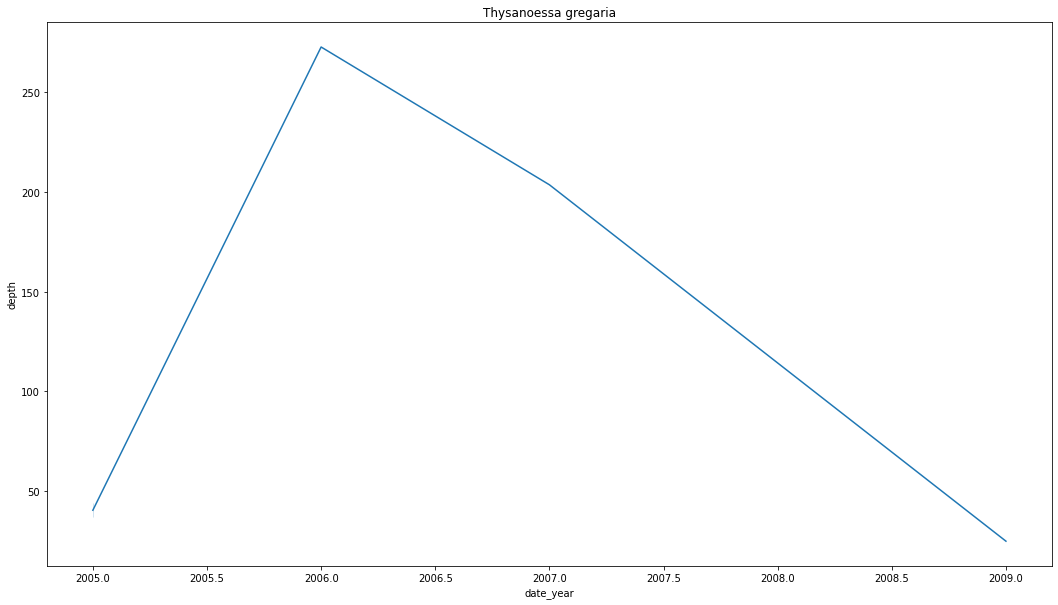

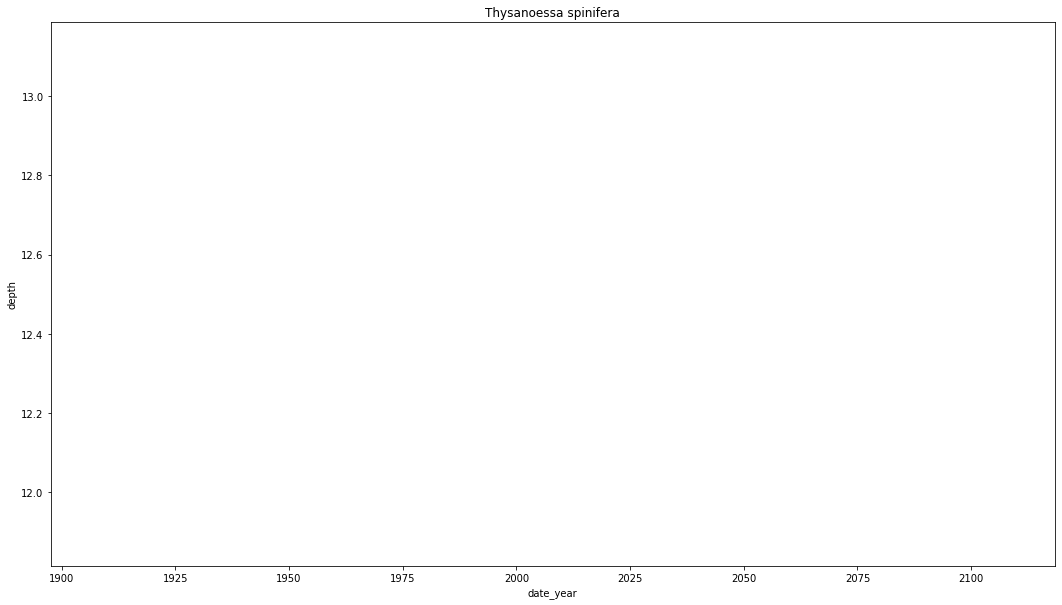

In [33]:
for i in new_df.scientificName.unique():
    sns.lineplot(x = new_df[new_df["scientificName"]==i]["date_year"], y=new_df[new_df["scientificName"]==i]["depth"])
    plt.title(i)
    plt.show()

In [34]:
new_df.groupby("scientificName").date_year

## Taxon 159581

In [35]:
_159581 = occ.search(
    taxonid = 159581,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 57516/57516
Fetched 57516 records.


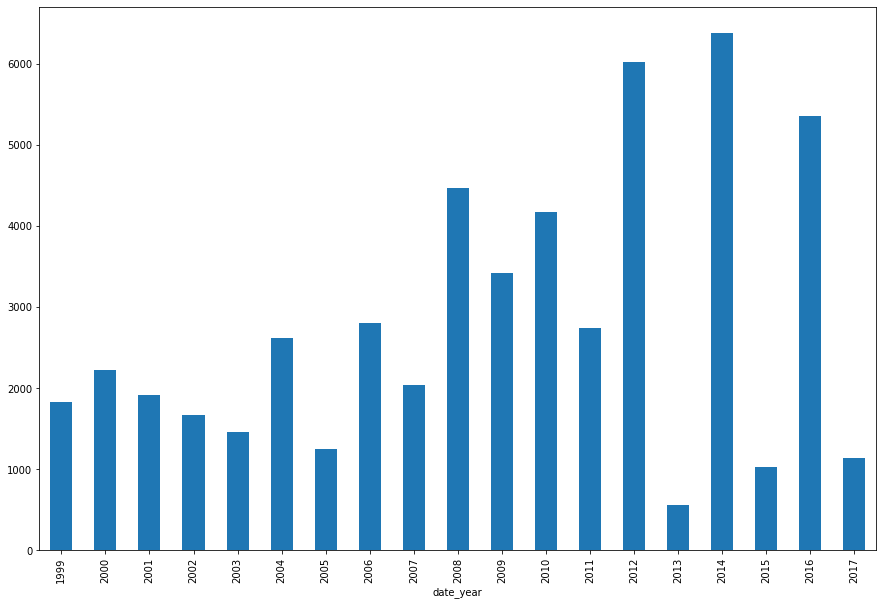

In [36]:
_159581.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

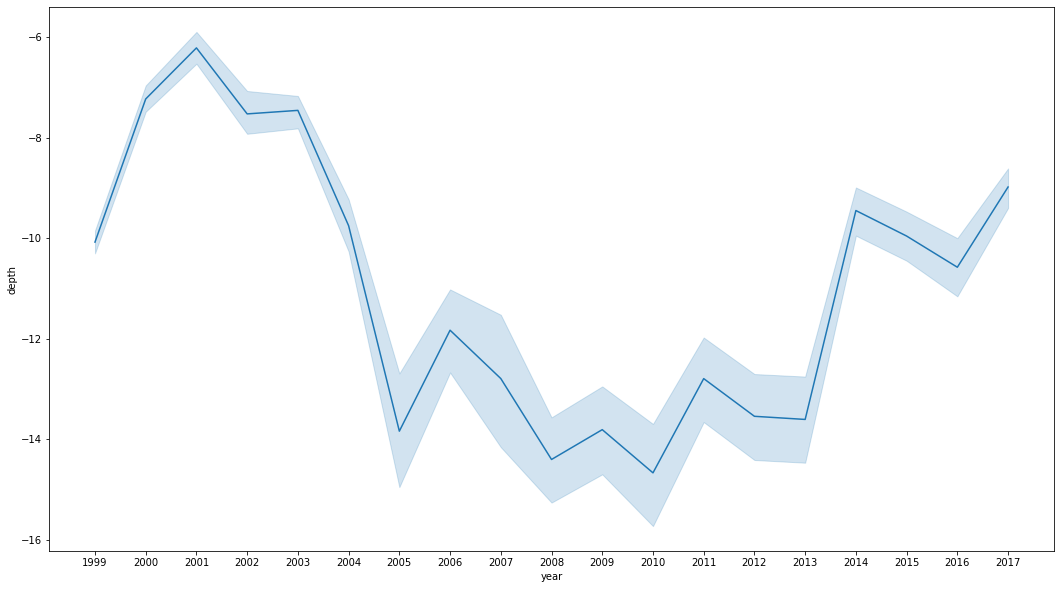

In [37]:
_159581.sort_values(by="year", inplace=True)
sns.lineplot(x = _159581["year"], y=-_159581["depth"])

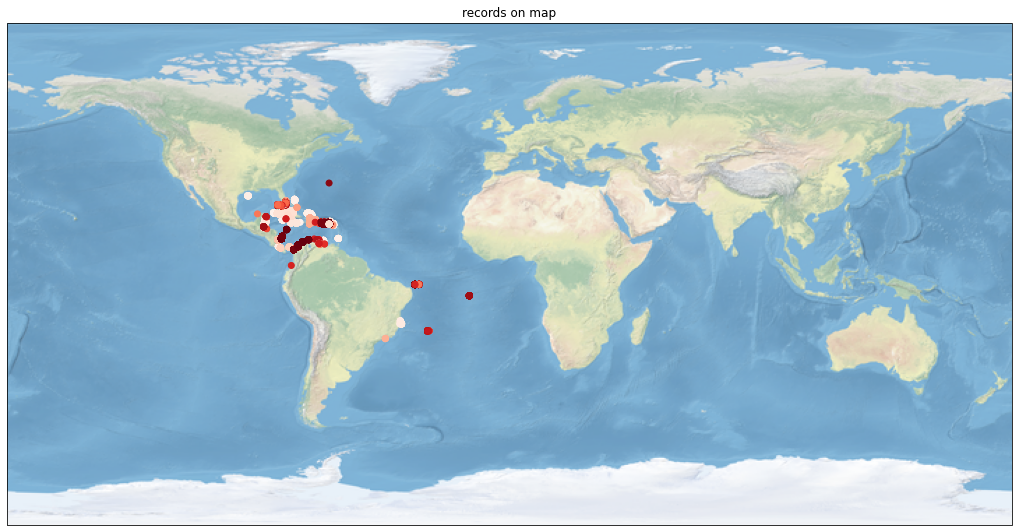

In [38]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_159581, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")
plt.show()

## Taxon 274294

In [39]:
_274294 = occ.search(
    taxonid = 274294,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 52056/52056
Fetched 52056 records.


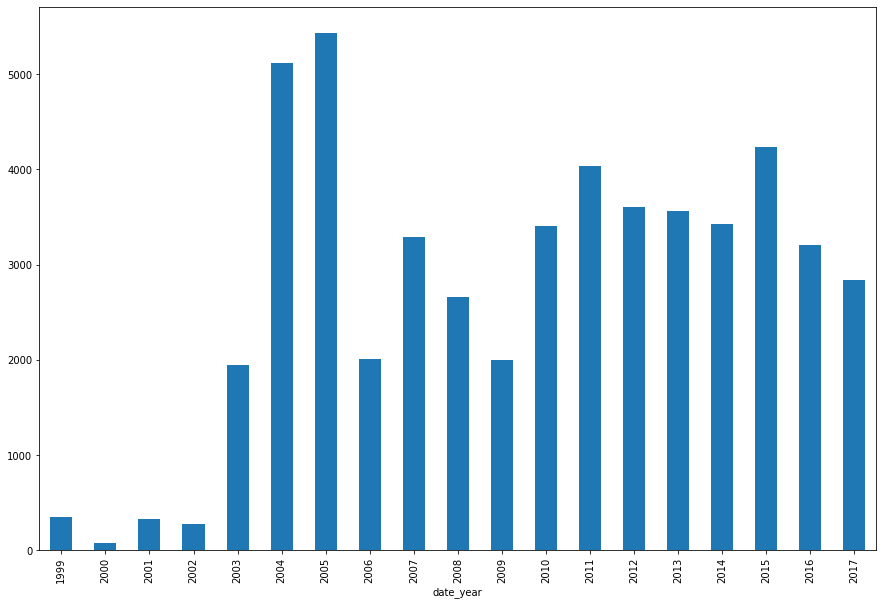

In [40]:
_274294.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

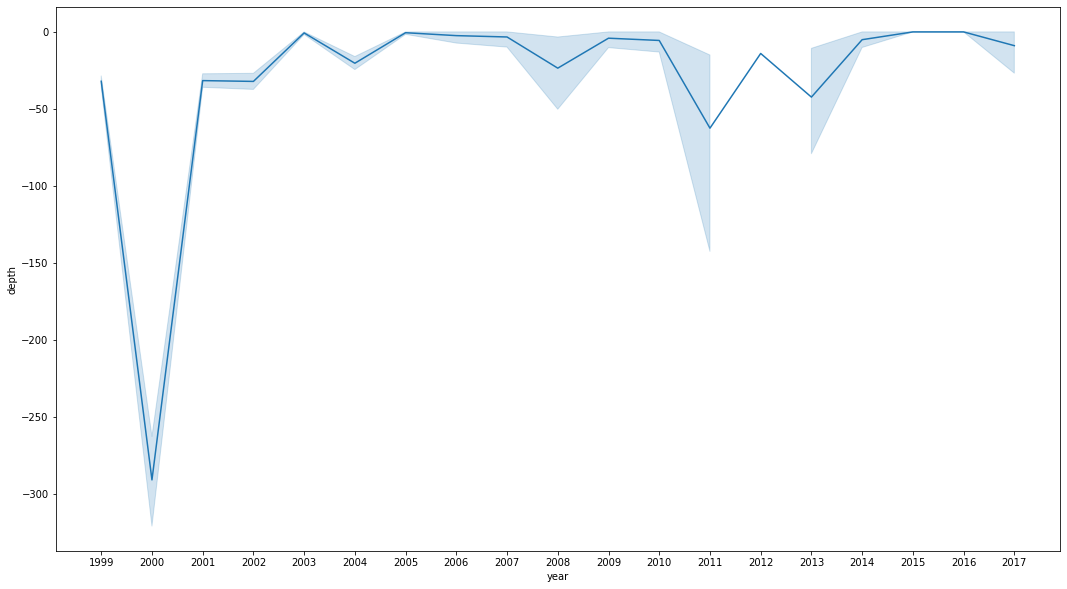

In [41]:
_274294.sort_values(by="year", inplace=True)
sns.lineplot(x = _274294["year"], y=-_274294["depth"])

## Taxon 110674

In [42]:
_110674 = occ.search(
    taxonid = 110674,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 3800/3800
Fetched 3800 records.


## Taxon 126792

In [43]:
_126792 = occ.search(
    taxonid = 126792,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 59297/59297
Fetched 59297 records.


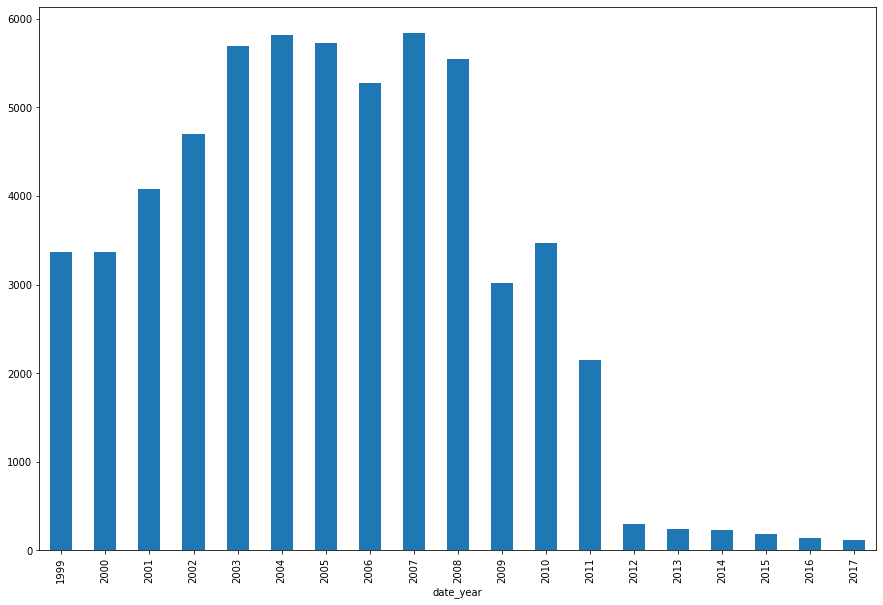

In [44]:
_126792.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

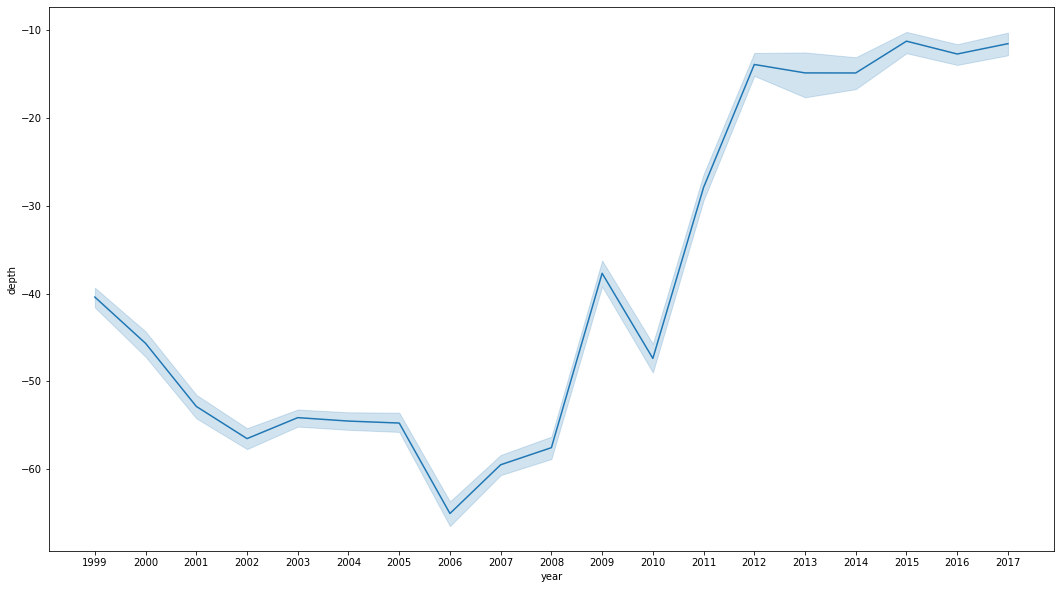

In [45]:
_126792.sort_values(by="year", inplace=True)
sns.lineplot(x = _126792["year"], y=-_126792["depth"])

## Taxon 127141

In [46]:
_127141 = occ.search(
    taxonid = 127141,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 96067/96067
Fetched 96067 records.


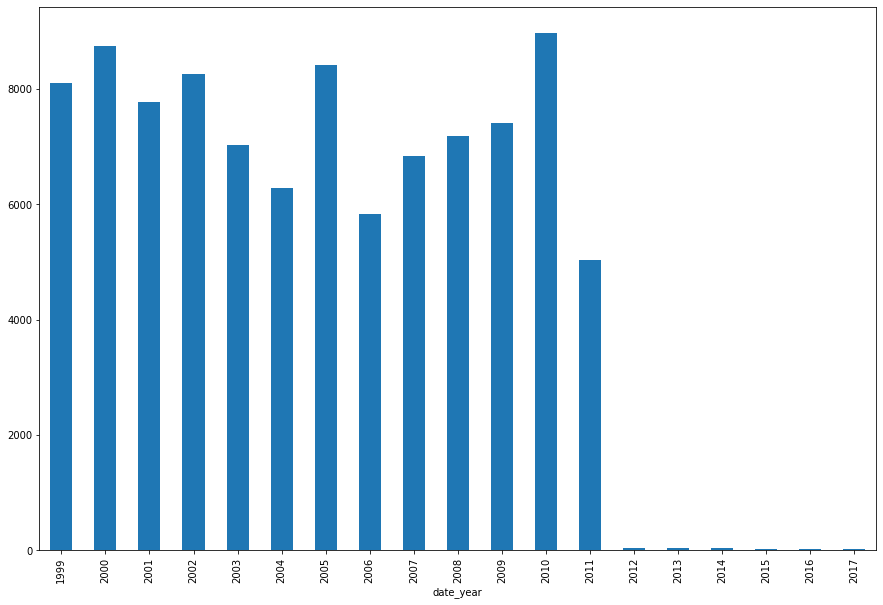

In [47]:
_127141.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

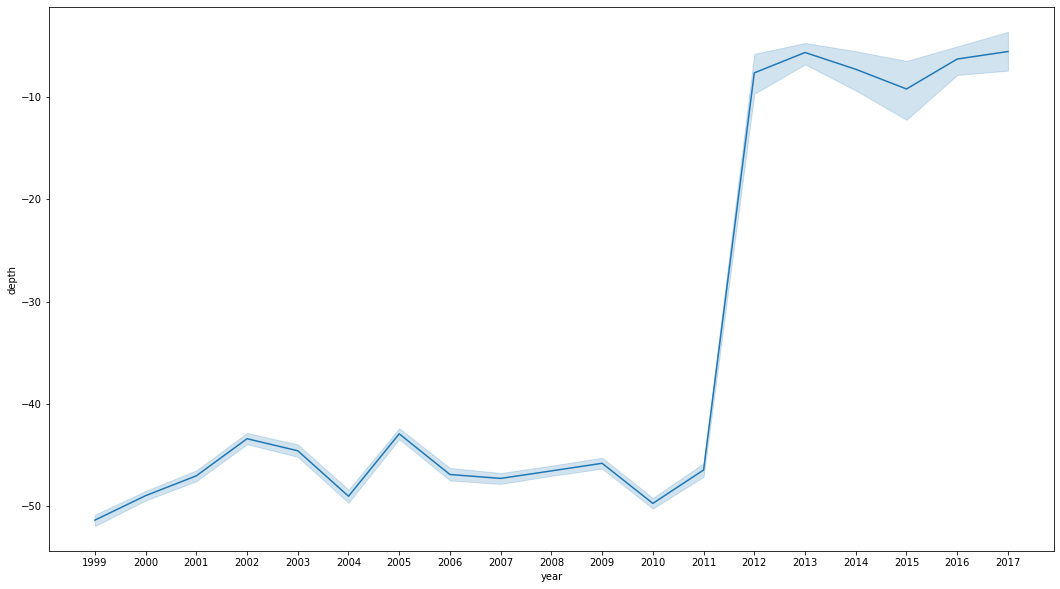

In [48]:
_127141.sort_values(by="year", inplace=True)
sns.lineplot(x = _127141["year"], y=-_127141["depth"])

## Taxon 126437

In [49]:
_126437 = occ.search(
    taxonid = 126437,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 179983/179983
Fetched 179983 records.


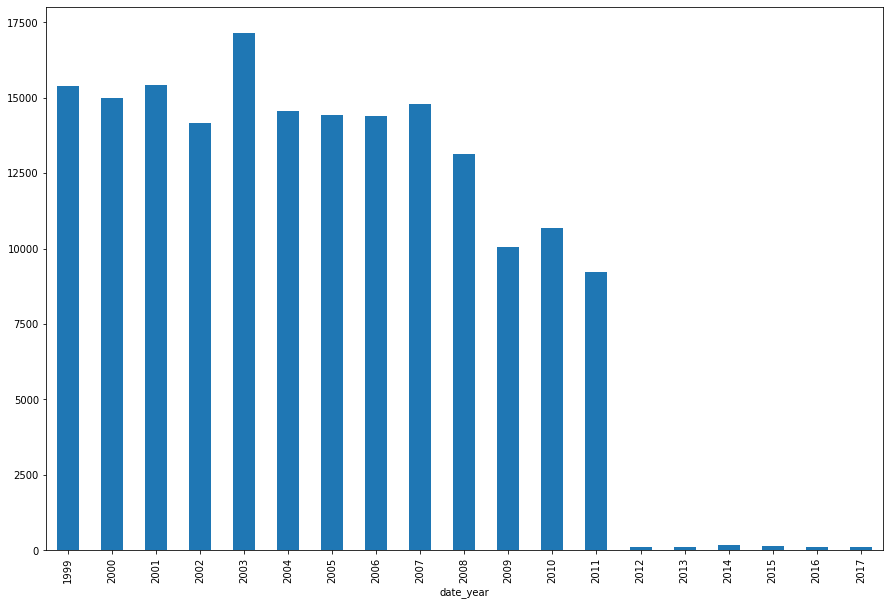

In [50]:
_126437.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

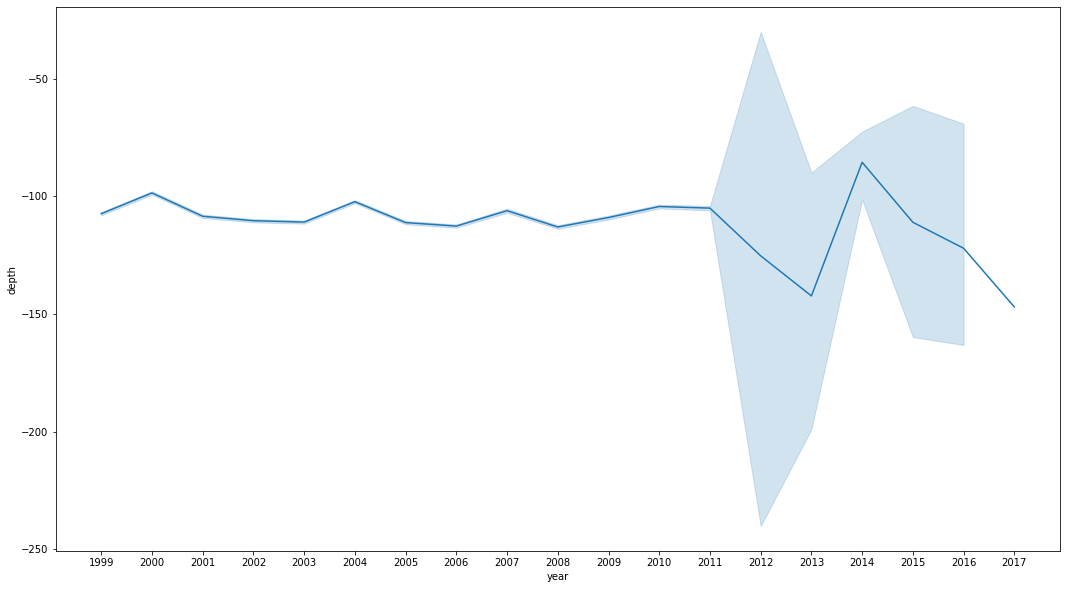

In [51]:
_126437.sort_values(by="year", inplace=True)
sns.lineplot(x = _126437["year"], y=-_126437["depth"])

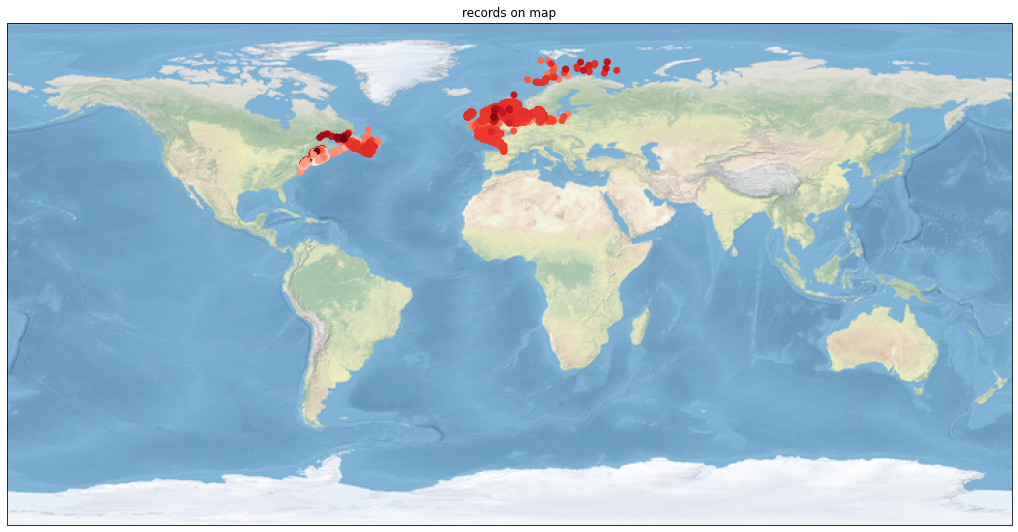

In [52]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_126437, transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")
plt.show()

## Taxon 126444

In [53]:
_126444 = occ.search(
    taxonid = 126444,
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    startdepth=-2000,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 53500/53500
Fetched 53500 records.


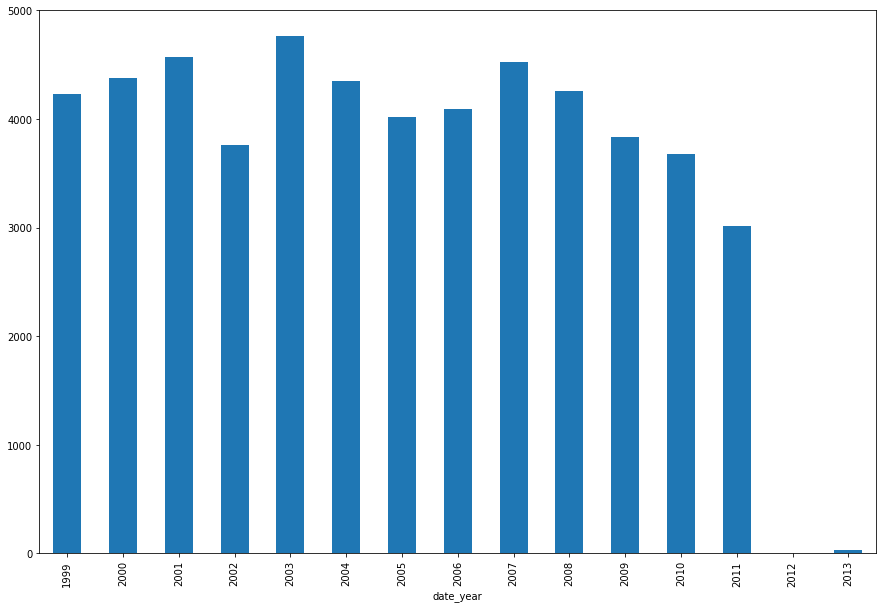

In [54]:
_126444.groupby("date_year").occurrenceID.count().plot.bar(figsize=(15,10));

<AxesSubplot:xlabel='year', ylabel='depth'>

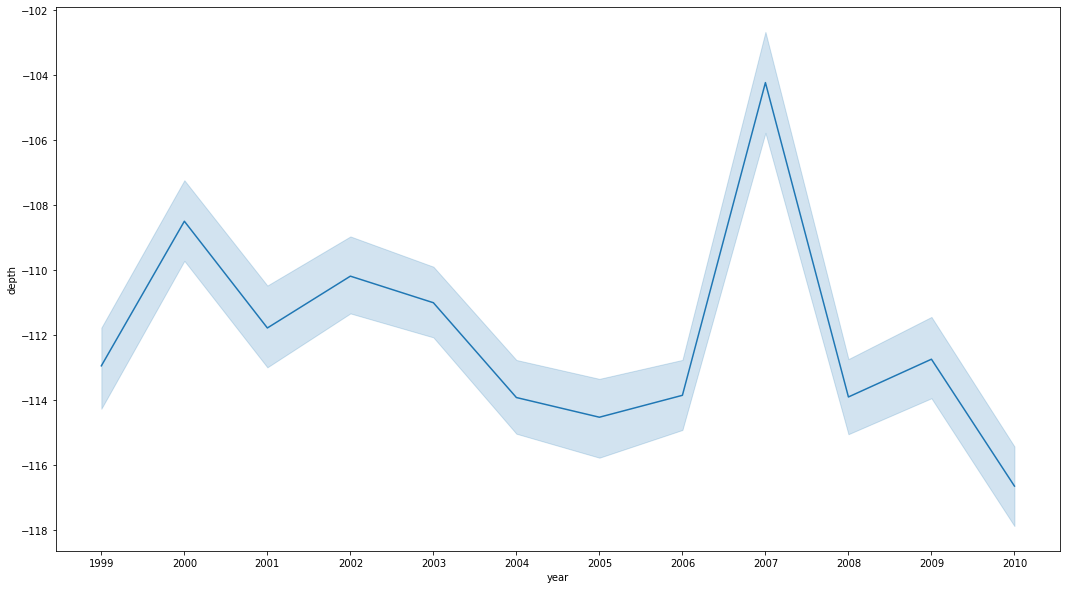

In [55]:
_126444.sort_values(by="year", inplace=True)
sns.lineplot(x = _126444[_126444["year"]<"2011"]["year"], y=-_126444[_126444["year"]<"2011"]["depth"])

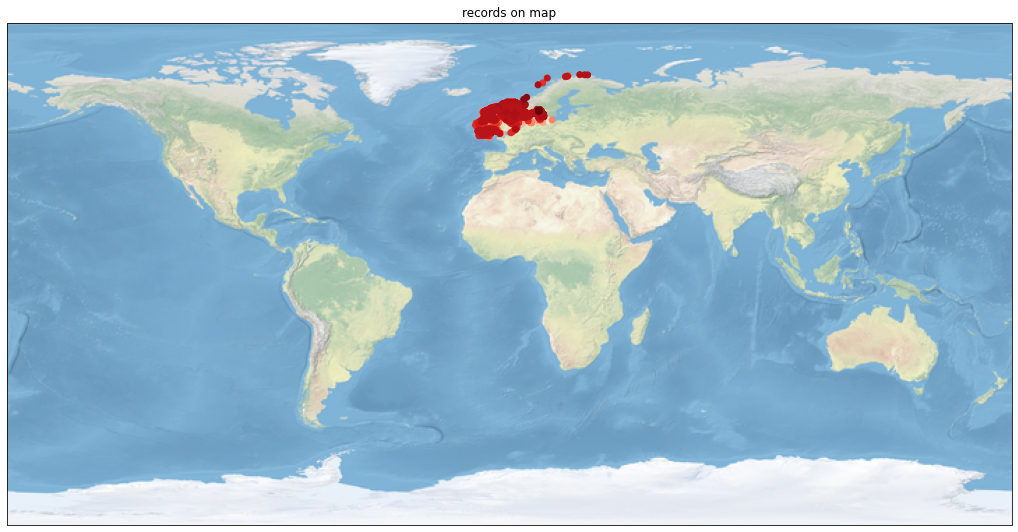

In [56]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_126444[_126444["year"]!="2007"], transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")
plt.show()

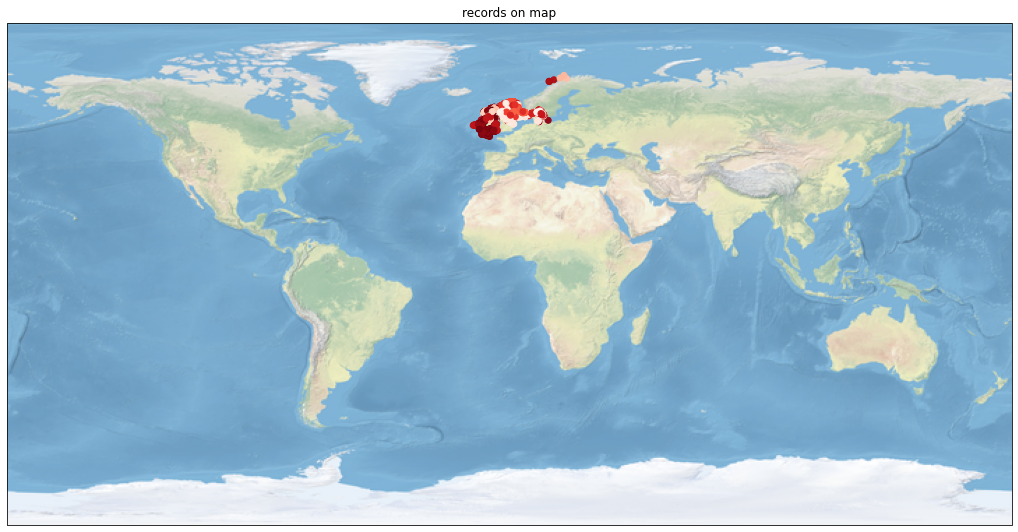

In [57]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()

ax.scatter(x="decimalLongitude", y="decimalLatitude", c="date_mid", cmap="Reds", data=_126444[_126444["year"]=="2007"], transform=cartopy.crs.PlateCarree())
ax.set_title("records on map")
plt.show()

## Species to not count
+ [x] Anatarctic Fur Seal -> no depth 0
+ [x] Sea Butterfly -> no depth 396/5 lakhs
+ [x] Eudyptula minor -> temporal dist poor